In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import networkx as nx

import syft as sy
from syft.service.action.action_graph_service import ActionGraphService, NodeActionDataUpdate, ExecutionStatus
from syft.service.action.action_graph_service import NodeActionData, NodeType
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.action.action_graph import NetworkXBackingStore
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey, SyftVerifyKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph_service import ExecutionStatusPartitionKey
from syft.store.document_store import QueryKeys
from syft.service.response import SyftError
print(sy.__version__)

signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
in_mem_graph_config = InMemoryGraphConfig()
authed_context = AuthedServiceContext(credentials=verify_key)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.1-beta.0


## `add_action_obj`

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)

In [3]:
action_obj = ActionObject.from_obj([1, 2, 3])
in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj
)

```python
class NodeActionData:
  id: str = 3f393e8c0bd04d3bbd8b724853e300b4
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-10 20:11:18
  updated_at: str = None
  user_verify_key: str = b0d2ee70a52ddf64341dbe3de491a434b2cbf43799e2ef70db44f6da97e5b915
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [11]:
error = in_mem_action_graph_service.add_action_obj(
    context=authed_context, action_obj=action_obj
)

In [20]:
action_obj.id

<UID: 630cdb4995d54ab68b592bd52bf86d77>

In [18]:
'Node already exists in the graph' in error.message

True

## `add_action` (no mutagen)

action_obj: d = [1, 2 ,3]  
action:     np.array(d)

In [24]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
in_mem_action_graph_service = ActionGraphService(store=in_mem_graph_store)
G = in_mem_action_graph_service.store.graph.db
labels_dict = {}

In [25]:
action_obj_d = ActionObject.from_obj([1, 2, 3])
in_mem_action_graph_service.add_action_obj(context=authed_context, 
                                           action_obj=action_obj_d)
labels_dict[action_obj_d.id] = "[1, 2 ,3]"

In [26]:
action = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_node, result_node = in_mem_action_graph_service.add_action(
    context=authed_context, action=action
)
labels_dict[action.id] = "np.array"
labels_dict[action.result_id.id] = "d"

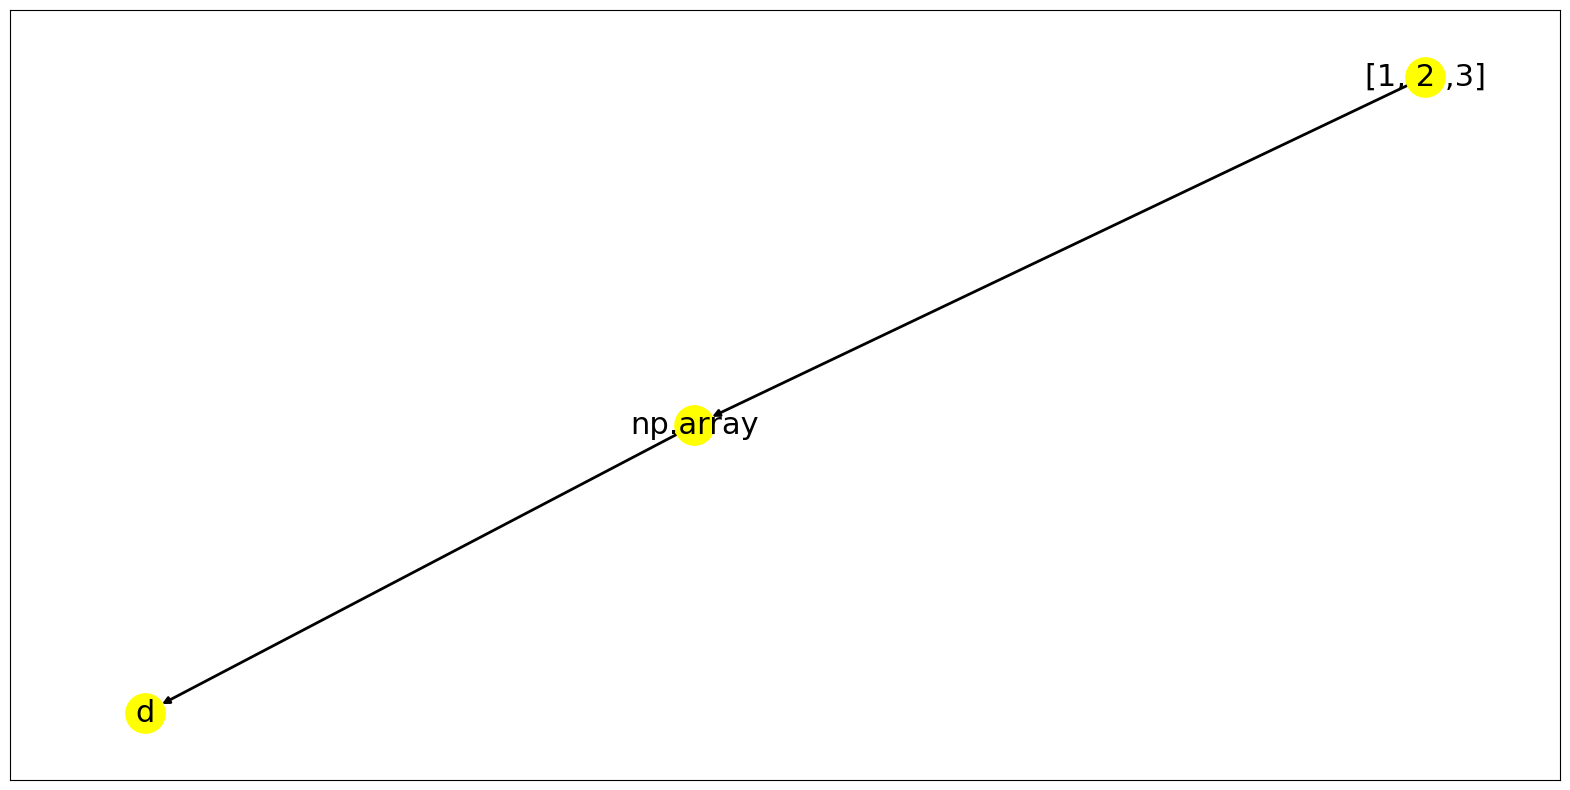

In [27]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, labels=labels_dict, with_labels=True, width=2.0, node_color="yellow", node_size=800, font_size=22)

In [34]:
action

```python
class Action:
  id: str = 6d07e870d4f7483ebf9a42d49e3f1545
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 426b44d99b4b405eb889273b310330e1 - 856614150587888615>]
  kwargs: str = {}
  result_id: str = 01eaf26826d94828ac3c61c49a81ac56

```

In [33]:
action_node

```python
class NodeActionData:
  id: str = 6d07e870d4f7483ebf9a42d49e3f1545
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-10 21:07:35
  updated_at: str = None
  user_verify_key: str = 4abed845f5c244ae3f478e16f841daf9ee00b37c1e062f9cbcd95535c482fd99
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [35]:
result_node

```python
class NodeActionData:
  id: str = 01eaf26826d94828ac3c61c49a81ac56
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-10 21:07:35
  updated_at: str = None
  user_verify_key: str = 4abed845f5c244ae3f478e16f841daf9ee00b37c1e062f9cbcd95535c482fd99
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None

```

In [ ]:
action.

## `add_action` (mutagen)

## Lots of Mutations

In [2]:
in_mem_graph_store = InMemoryActionGraphStore(in_mem_graph_config)
action_graph_service = ActionGraphService(store=in_mem_graph_store)
labels_dict = {}
G = action_graph_service.store.graph.db

In [3]:
# d = [1,2,3]
action_obj_d = ActionObject.from_obj([1, 2, 3])
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=action_obj_d)
labels_dict[action_obj_d.id] = "[1, 2 ,3]"

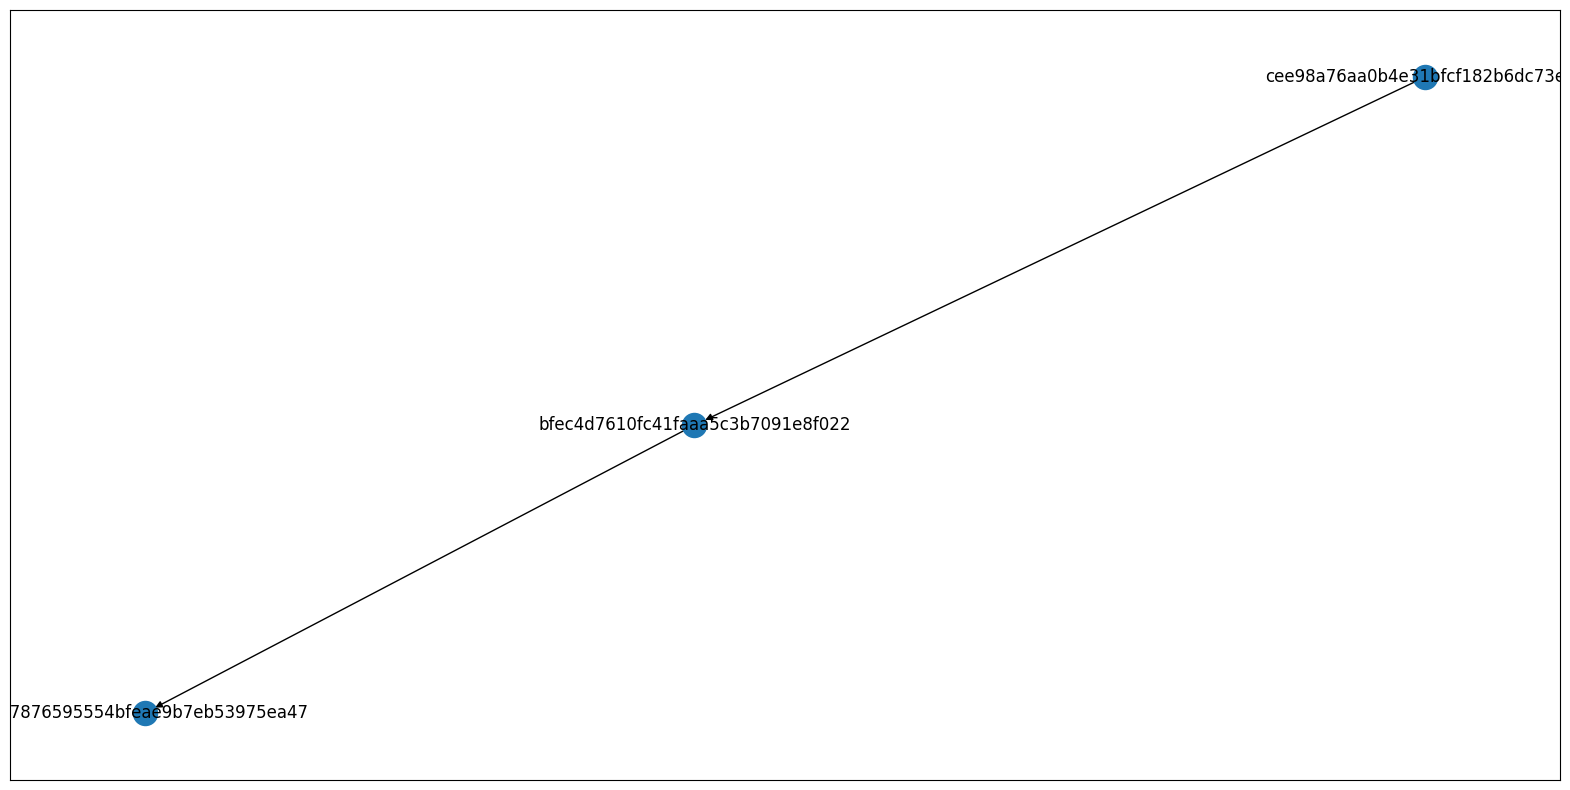

In [4]:
# d = np.array(d)
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action2)
labels_dict[action2.id] = "np.array"
labels_dict[action2.result_id.id] = "D"

action_graph_service.store.graph.visualize()

In [5]:
# d.astype('int32')
as_type_action_obj = ActionObject.from_obj('np.int32')
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=as_type_action_obj)
labels_dict[as_type_action_obj.id] = "np.int32"
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, 
                                action=action4)
labels_dict[action4.id] = "astype"

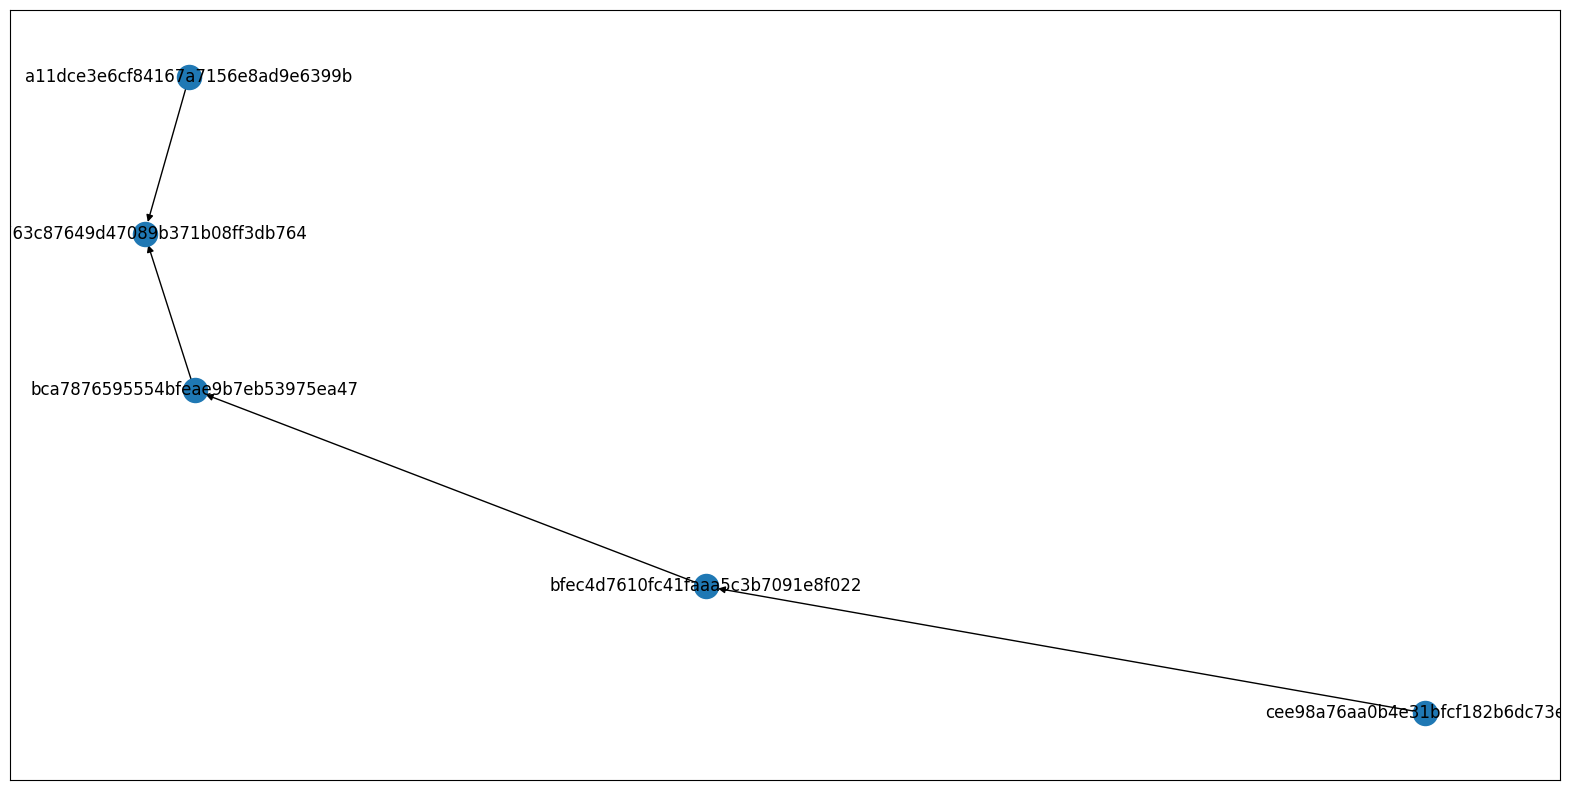

In [6]:
action_graph_service.store.graph.visualize()

In [7]:
# d[2] = 5
idx_action_obj = ActionObject.from_obj(2)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=idx_action_obj)
labels_dict[idx_action_obj.id] = "idx=2"
item_val_action_obj = ActionObject.from_obj(5)
action_graph_service.add_action_obj(context=authed_context, 
                                    action_obj=item_val_action_obj)
labels_dict[item_val_action_obj.id] = "val=5"
action5 = Action(
    path="action.execute",
    op="__setitem__",
    remote_self=action2.result_id,
    args=[idx_action_obj.syft_lineage_id, 
          item_val_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, action=action5)
labels_dict[action5.id] = "__setitem__"

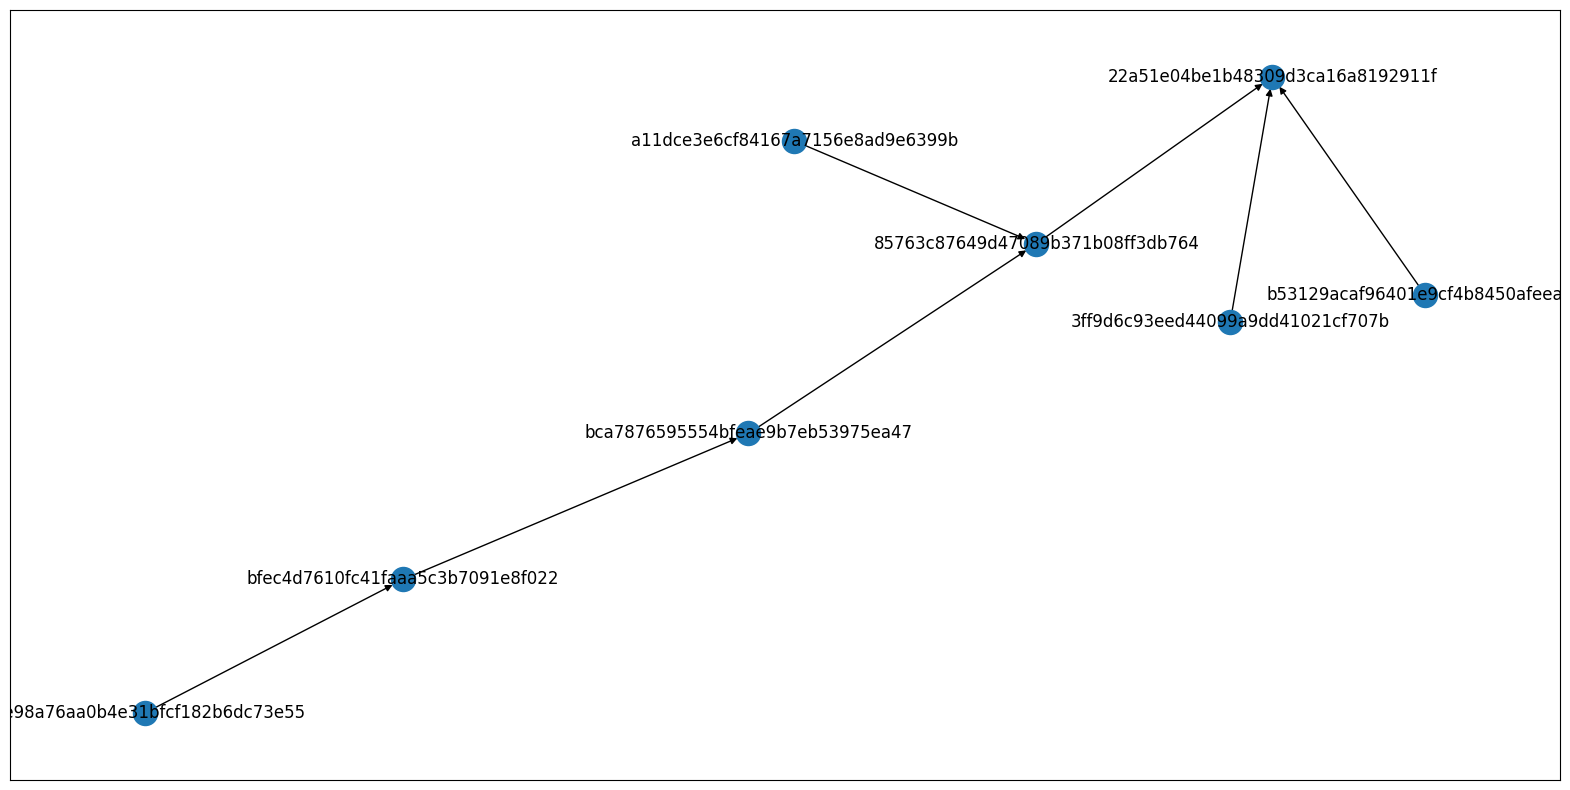

In [8]:
action_graph_service.store.graph.visualize()

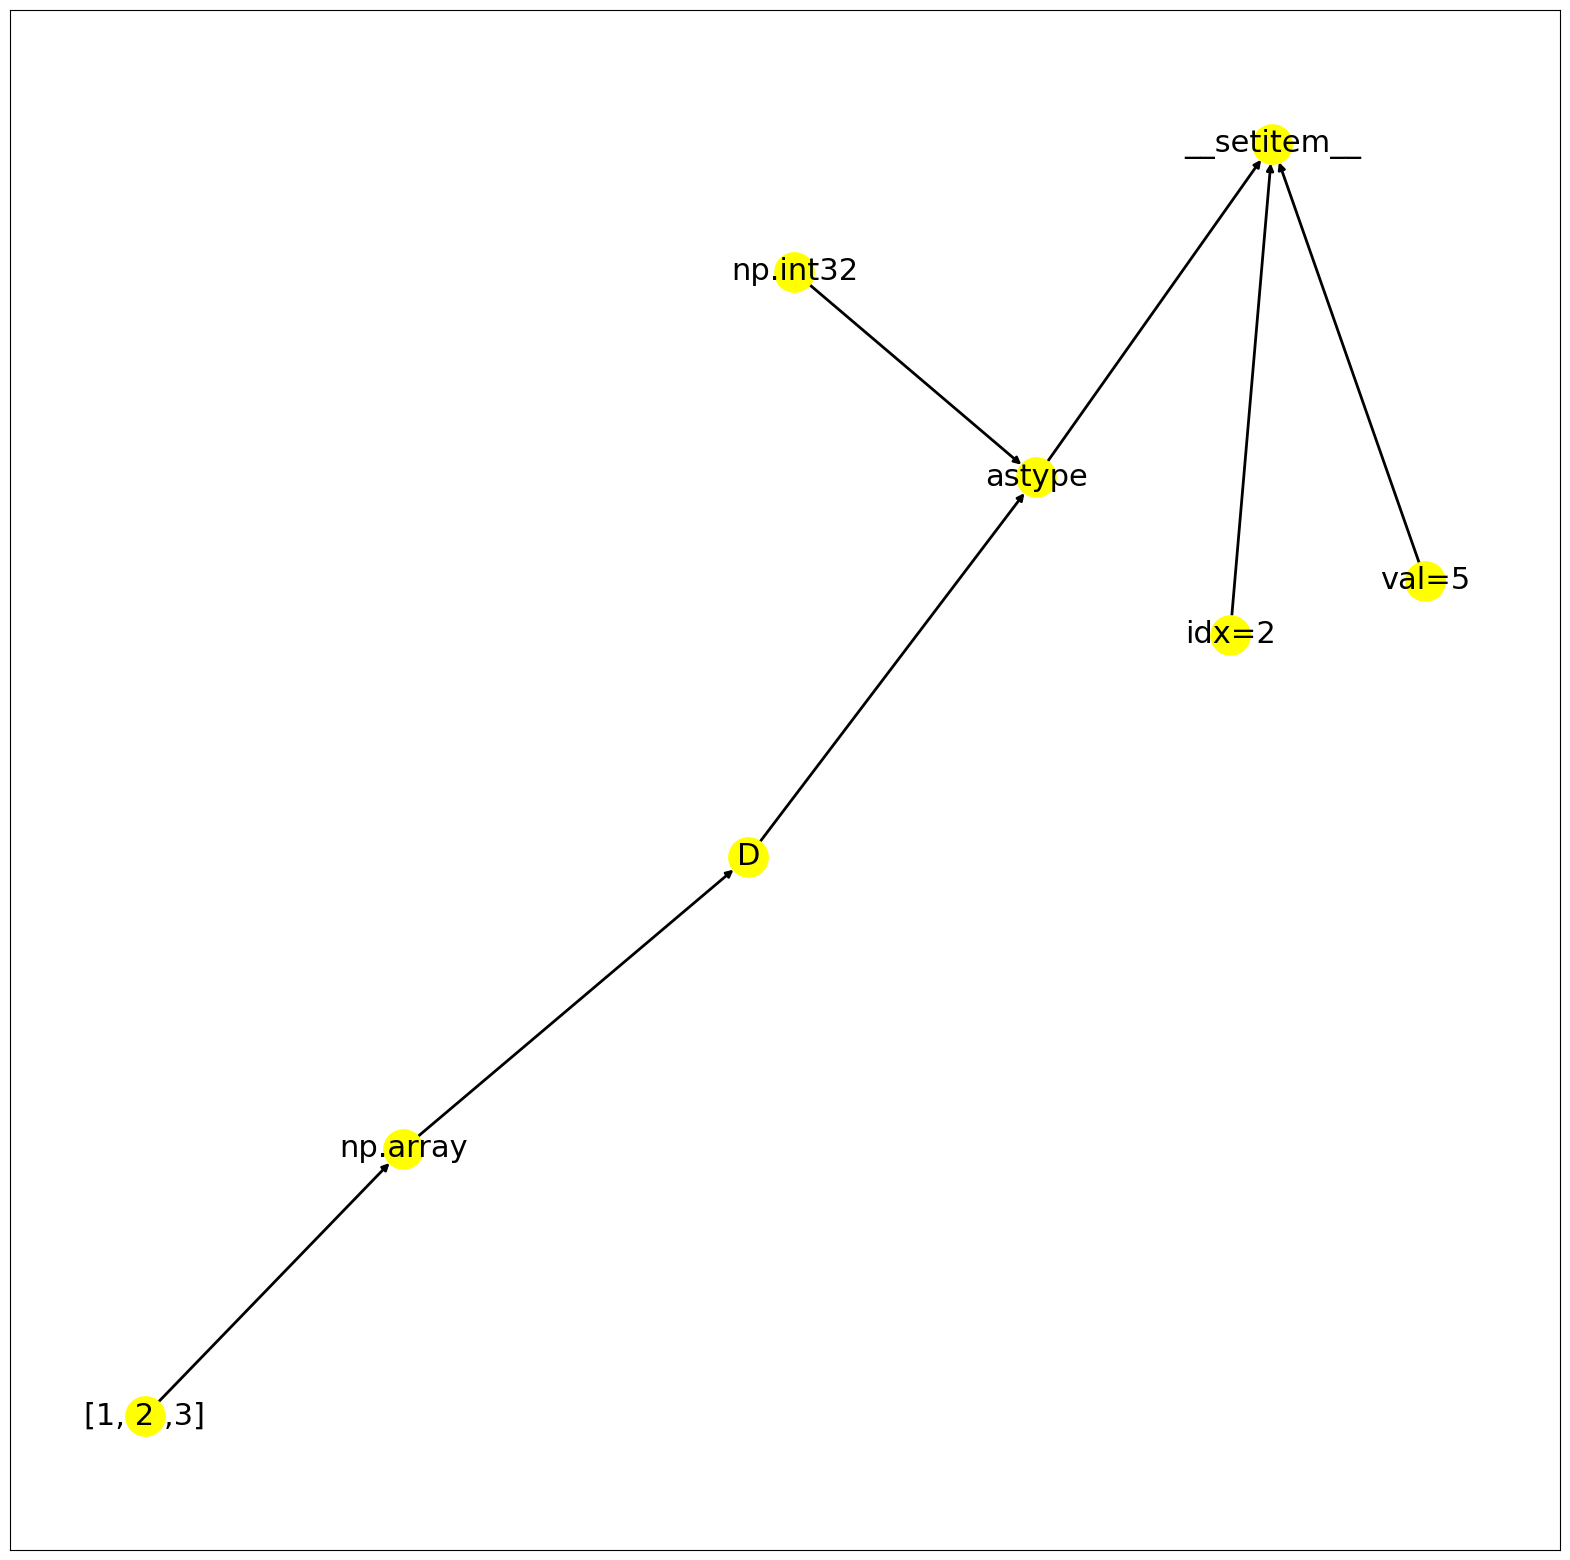

In [9]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=3113794652)
# nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx(G, pos=pos, 
                 labels=labels_dict, 
                 with_labels=True, width=2.0, 
                 node_color="yellow", node_size=800, font_size=22)

In [11]:
action_graph_service.store.nodes(verify_key)

Ok(NodeDataView({<UID: cee98a76aa0b4e31bfcf182b6dc73e55>: {'data': class NodeActionData:
  id: str = cee98a76aa0b4e31bfcf182b6dc73e55
  type: str = NodeType.ACTION_OBJECT
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-10 02:49:57
  updated_at: str = None
  user_verify_key: str = c36199acd4b083ede3cdb2a7dd22e570e5755e396de42cbe5ad078159bf8cb36
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: bfec4d7610fc41faaa5c3b7091e8f022>: {'data': class NodeActionData:
  id: str = bfec4d7610fc41faaa5c3b7091e8f022
  type: str = NodeType.ACTION
  status: str = ExecutionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-05-10 02:49:57
  updated_at: str = None
  user_verify_key: str = c36199acd4b083ede3cdb2a7dd22e570e5755e396de42cbe5ad078159bf8cb36
  is_mutated: str = False
  is_mutagen: str = False
  next_mutagen_node: str = None
  last_nm_mutagen_node: str = None
}, <UID: bc